# Clustering

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
# Función para obtener clusters mediante K-means #
def kmeans_clustering(data, k):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(data)
    return kmeans

In [3]:
# Función para visualización de clusters #
def plot_clusters(data, clustering_model, dim_reduction, title=None):
    if dim_reduction == True:
        pca = PCA(n_components=2)
        X_r = pca.fit(data).transform(data)
    
    y = clustering_model.labels_
    target_names = []
    for label in y:
        if label not in target_names:
            target_names.append(label)
    plt.figure(figsize=(20, 10))
    lw = 2
    colors = ['black', 'turquoise', 'blue', 'RED', 'green', 'darkorange', 'yellow', 'magenta']

    for color, i, target_name in zip(colors, target_names, target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.4, lw=lw, label=target_name)
    
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)
    plt.show()

In [4]:
#Función para obtener el número optimo de clusters utilizando el método del codo#
def elbow_method(data, cluster_number):
    sse = []
    for k in range(1, cluster_number):
        model = kmeans_clustering(data, k)
        sse.append(model.inertia_)
    
    kl = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')
    
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, cluster_number), sse)
    plt.xticks(range(1, cluster_number))
    plt.xlabel("Número de clusters")
    plt.ylabel("SSE")
    plt.show()
    
    return kl.elbow

In [5]:
# Función para evaluar los clusters creados mediante silhouette coefficient #
def plot_silhouette_coefficient(data, cluster_number):
    silhouette_coefficients = []
    for k in range(2,cluster_number):
        model = kmeans_clustering(data, k)
        score = silhouette_score(data, model.labels_)
        silhouette_coefficients.append(score)
    
    plt.style.use("fivethirtyeight")
    plt.plot(range(2, cluster_number), silhouette_coefficients)
    plt.xticks(range(2, cluster_number))
    plt.xlabel("Numero de clusters")
    plt.ylabel("Silhouette Coefficient")
    plt.show()

In [6]:
#Función para obtener el valor de silhouette coefficient de un modelo #
def silhouette_coefficient(data, clustering_model):
    return silhouette_score(data, clustering_model.labels_).round(4)

### Lectura de dataset y extracción de características

In [7]:
FILE_PATH = "../Data/numerical.csv"
df = pd.read_csv(FILE_PATH, encoding='utf-8', error_bad_lines=False)
# Elimina renglones con algún valor NULL #
df = df.dropna()
# Reset a los valores del index en el dataframe #
df = df.reset_index(drop=True)
# Codificación de variables categoricas #
columns = ['brand', 'OS', 'battery_removable', 'battery_type']
encoder = preprocessing.LabelEncoder()
df_encoded = df[columns].apply(encoder.fit_transform)
df = df.drop(columns, axis=1)
df = df.join(df_encoded)
df.drop(df[df['internal_memory_gb'] == '16GB'].index, inplace = True)
df

/home/german/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


,model,RAM,approx_price_EUR,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb,brand,OS,battery_removable,battery_type
0,Iconia Talk S,2.000,170.0,3400.0,4,1.30,13.0,2.0,32.0,0,0,0,0
1,Liquid Z6 Plus,3.000,250.0,4080.0,8,1.30,13.0,5.0,32.0,0,0,1,1
2,Liquid Z6,1.000,120.0,2000.0,4,1.25,8.0,2.0,8.0,0,0,1,0
3,Liquid X2,3.000,230.0,4020.0,8,1.30,13.0,13.0,32.0,0,0,1,1
4,Liquid Zest Plus,2.000,200.0,5000.0,4,1.30,13.0,5.0,16.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,Grand X LTE T82,1.000,340.0,1900.0,2,1.50,8.0,1.3,4.0,56,0,1,0
1877,Grand X V970,1.000,230.0,1600.0,1,1.00,5.0,0.6,4.0,56,0,1,0
1878,Optik,1.000,230.0,4000.0,2,1.20,5.0,2.0,16.0,56,0,0,0
1879,Light Tab 2 V9A,0.512,250.0,3400.0,1,1.40,3.2,0.6,4.0,56,0,0,0


In [8]:
features = ['approx_price_EUR', 'battery_mah', 'CPU_cores', 'battery_mah', 'CPU_speed',
            'internal_memory_gb', 'brand', 'OS', 'battery_removable','battery_type', 'primary_camera_mp']

In [9]:
x = df[features]

### Experimento 1. Clustering sin normalización de datos

In [10]:
kmeans = kmeans_clustering(x, k=8)

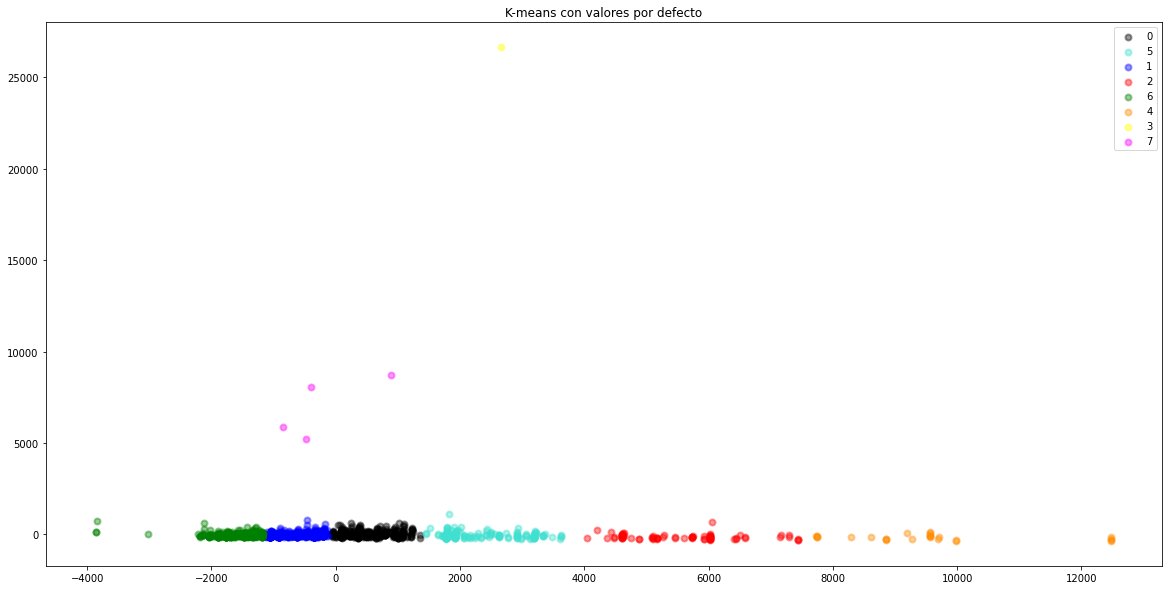

In [11]:
plot_clusters(data=x, clustering_model=kmeans, dim_reduction=True, title="K-means con valores por defecto")

In [12]:
silhouette_coefficient(data=x, clustering_model=kmeans)

0.5393

#### Búsqueda del número de clusters óptimo

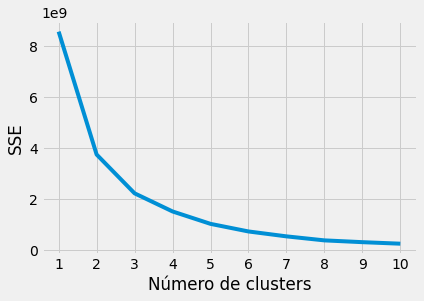

In [13]:
elbow = elbow_method(data=x, cluster_number=11)

In [14]:
optimal_model = kmeans_clustering(data=x, k=elbow)

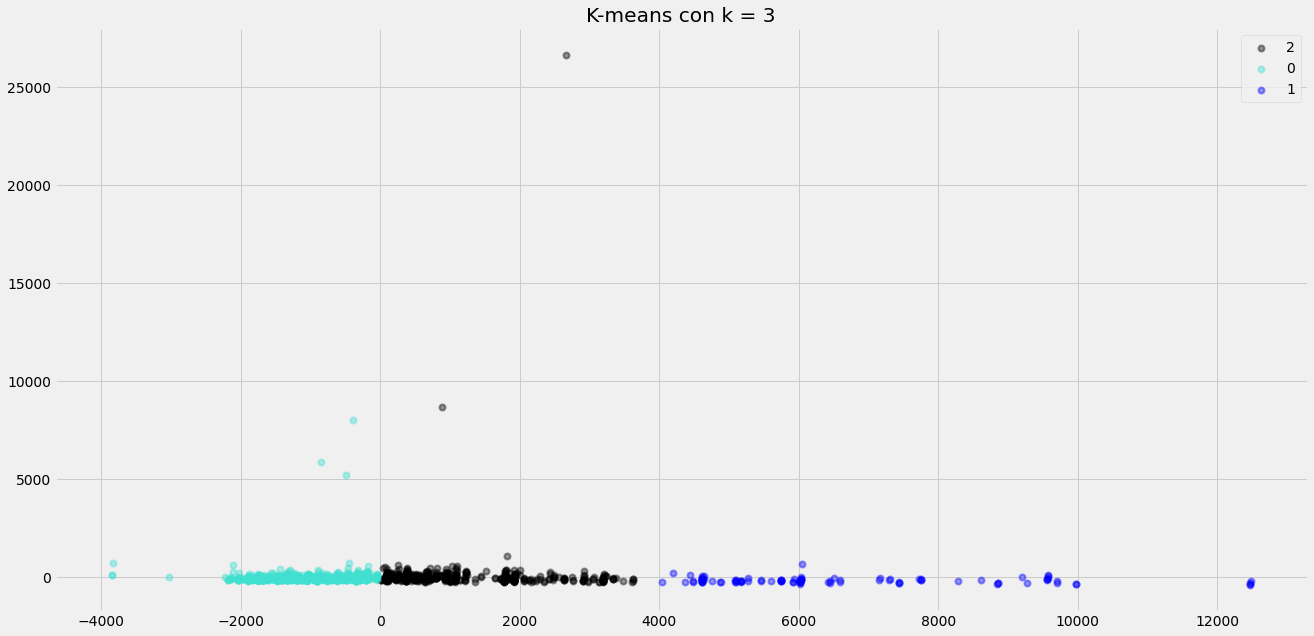

In [15]:
plot_clusters(data=x, clustering_model=optimal_model, dim_reduction=True, title="K-means con k = {}".format(elbow))

#### Evaluación de los clusters creados

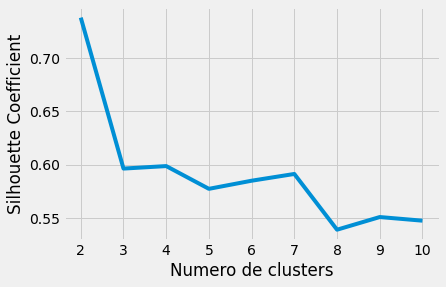

In [16]:
plot_silhouette_coefficient(data=x, cluster_number=11)

In [17]:
silhouette_coefficient(data=x, clustering_model=optimal_model)

0.5965

### Experimento 2. Normalización con StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
x_scaled = scaler.fit_transform(x)

In [20]:
kmeans = kmeans_clustering(x_scaled, k=8)

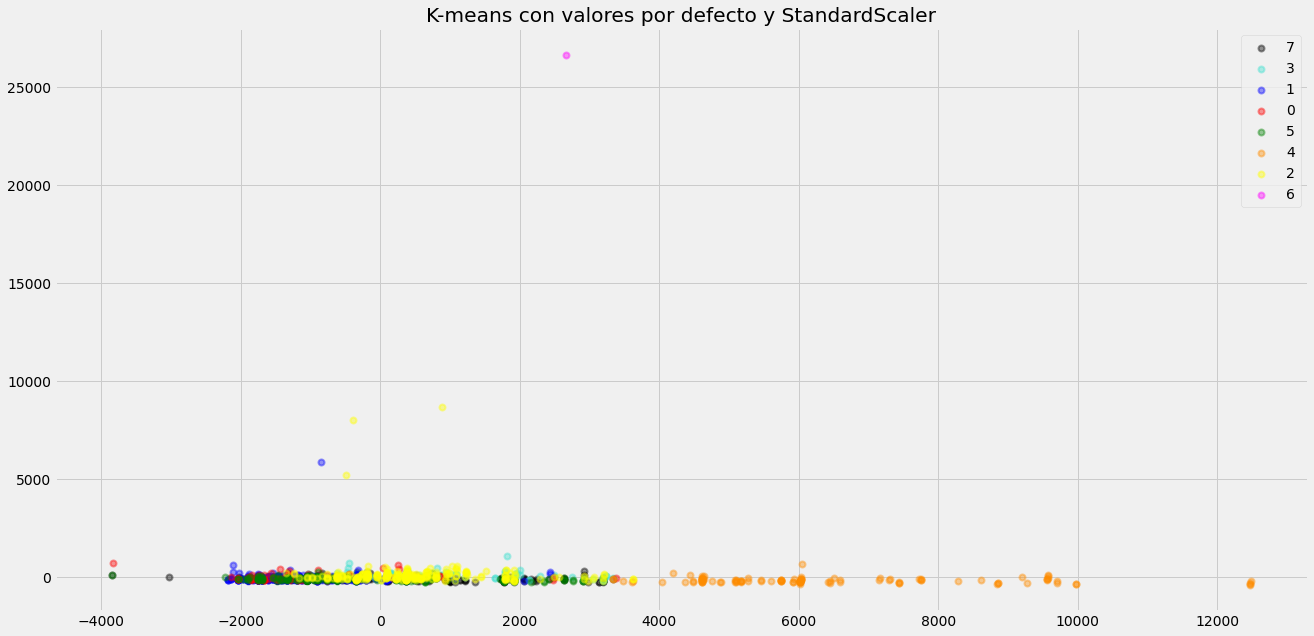

In [21]:
plot_clusters(data=x, clustering_model=kmeans, dim_reduction=True, title="K-means con valores por defecto y StandardScaler")

In [22]:
silhouette_coefficient(data=x_scaled, clustering_model=kmeans)

0.255

#### Búsqueda de número de clusters óptimo

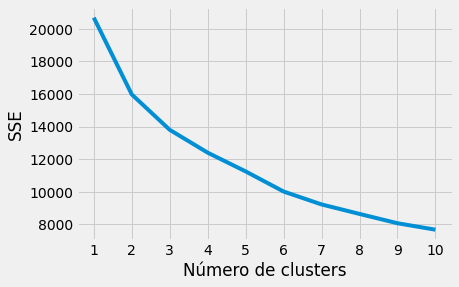

In [23]:
elbow = elbow_method(data=x_scaled, cluster_number=11)

In [24]:
optimal_model = kmeans_clustering(data=x_scaled, k=elbow)

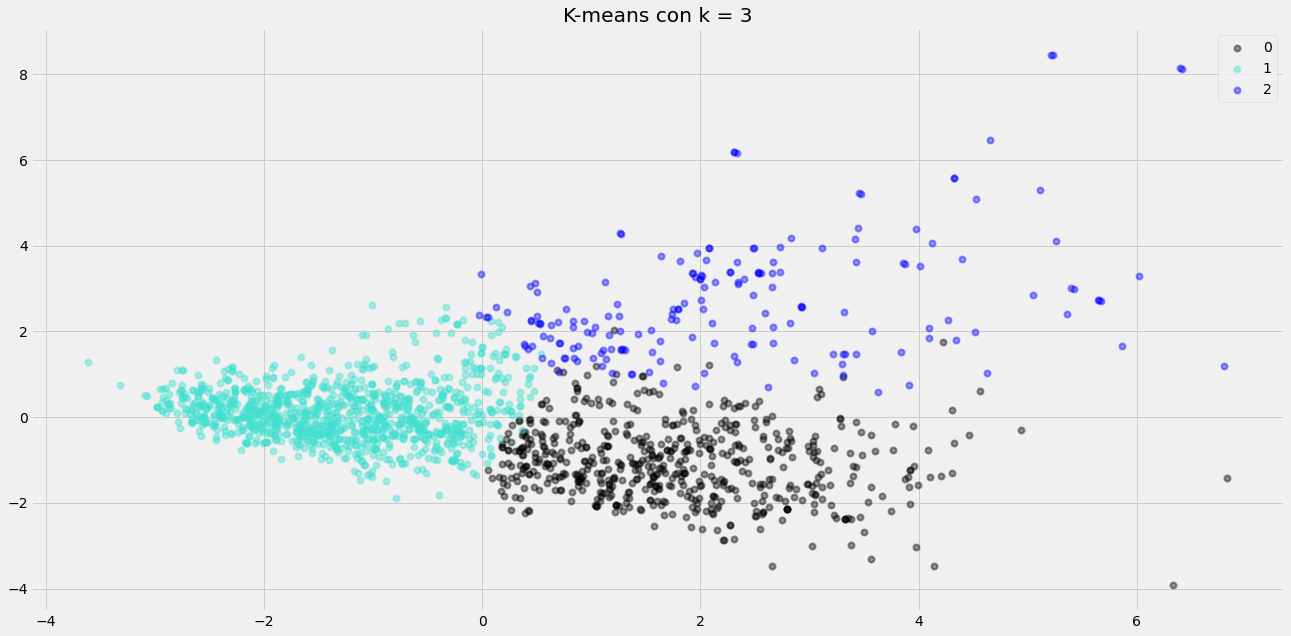

In [25]:
plot_clusters(data=x_scaled, clustering_model=optimal_model, dim_reduction=True, title="K-means con k = {}".format(elbow))

#### Evaluación de clusters creados

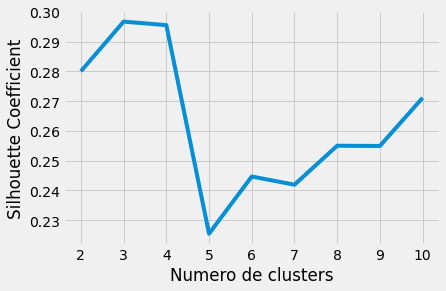

In [26]:
plot_silhouette_coefficient(data=x_scaled, cluster_number=11)

In [27]:
silhouette_coefficient(data=x_scaled, clustering_model=optimal_model)

0.2967

### Experimento 3. Normalización con MinMax Scaler

In [28]:
minmaxScaler = MinMaxScaler()

In [29]:
x_minmaxscaled = minmaxScaler.fit_transform(x)

In [30]:
kmeans = kmeans_clustering(x_minmaxscaled, k=8)

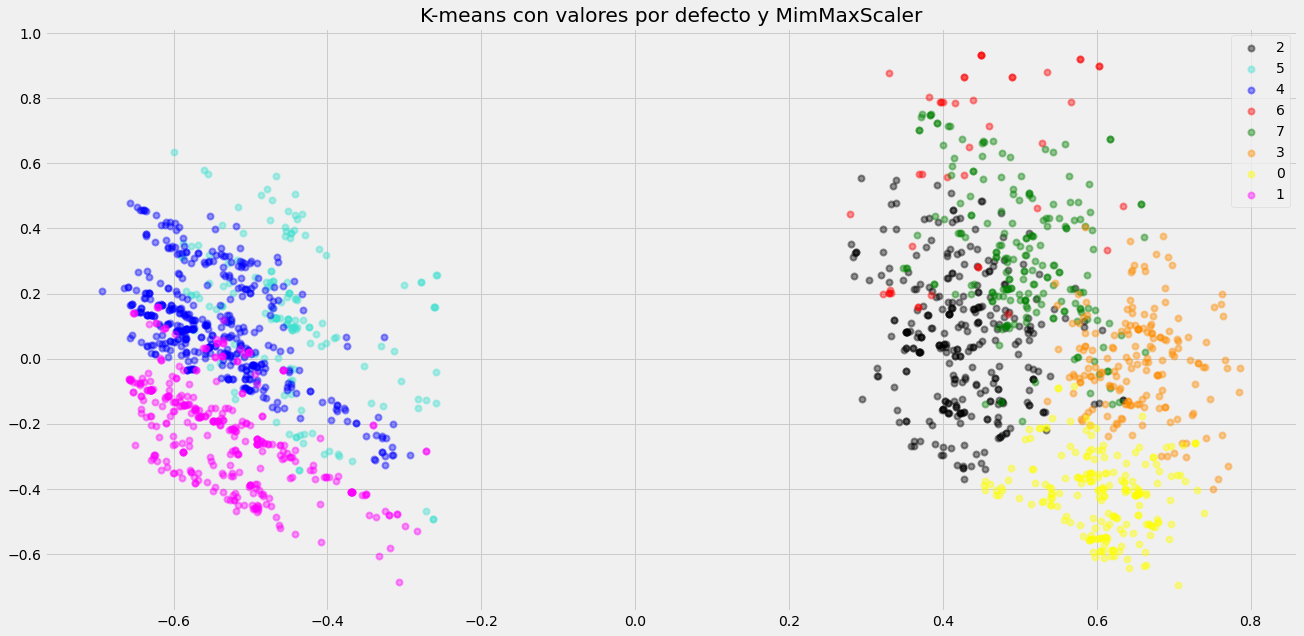

In [31]:
plot_clusters(data=x_minmaxscaled, clustering_model=kmeans, dim_reduction=True, title="K-means con valores por defecto y MimMaxScaler")

In [32]:
silhouette_coefficient(data=x_minmaxscaled, clustering_model=kmeans)

0.2676

#### Búsqueda del número de clusters óptimo

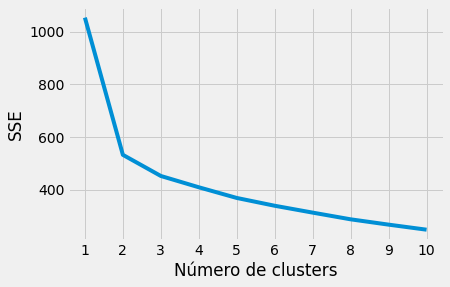

In [33]:
elbow = elbow_method(data=x_minmaxscaled, cluster_number=11)

In [34]:
optimal_model = kmeans_clustering(data=x_minmaxscaled, k=elbow)

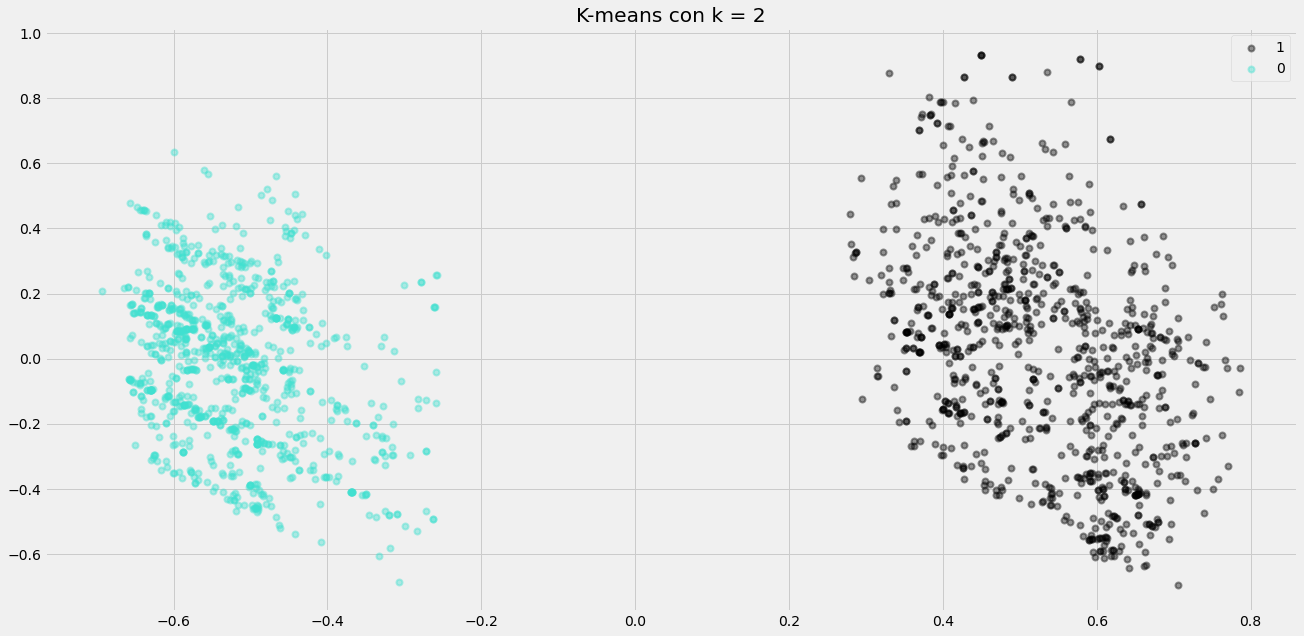

In [35]:
plot_clusters(data=x_minmaxscaled, clustering_model=optimal_model, dim_reduction=True, title="K-means con k = {}".format(elbow))

#### Evaluación de clusters creados

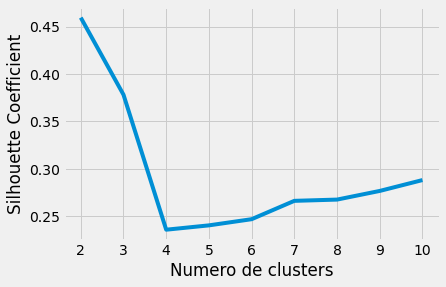

In [36]:
plot_silhouette_coefficient(data=x_minmaxscaled, cluster_number=11)

In [37]:
silhouette_coefficient(data=x_minmaxscaled, clustering_model=optimal_model)

0.4596